# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [29]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [6]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = Ruta + "datasets/iris/iris.csv"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [7]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [9]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [10]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [13]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

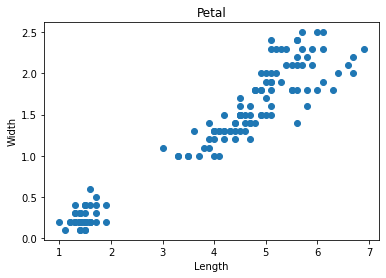

In [16]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

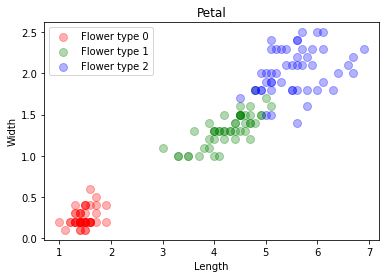

In [22]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [34]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#FlowerPredicted1 = km.fit_predict(dataset)
#FlowerPredicted1 = km.fit_predict(dataset[['Sepal_Length','Sepal_Width']])
FlowerPredicted1 = km.fit_predict(dataset[['Petal_Length','Petal_Width']] )

# Print estimated cluster of each point in the dataset
FlowerPredicted1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
dataset.Flower.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [38]:
# Manual pairing the labels of the real and estimated clusters
FlowerPredicted1new = np.choose(FlowerPredicted1, [0, 2, 1]).astype(int)
FlowerPredicted1new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Automatic pairing the labels of the real and estimated clusters: WORK IN PROGRESS

# Import library
# from sklearn.metrics.pairwise import pairwise_distances_argmin

# Centroides of the real clusters
#real_cluster_centers  = 

# Centroides of the estimated clusters
#esti_cluster_centers  = km2.cluster_centers_

# Compute order for the estimated clusters
#order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers )

# Get ordered estimated clusters
#esti_cluster_centers = esti_cluster_centers[order]

# Get paired labels
#real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
#esti_cluster_lables = pairwise_distances_argmin(X, esti_cluster_centers)


# NOTE: Use info in https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#establishing-parity-between-clusters

In [39]:
# Add a new column to the dataset with the cluster information
dataset['FlowerPredicted1'] = FlowerPredicted1new

dataset

,Petal_Length,Petal_Width,Flower,FlowerPredicted1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,2
146,5.0,1.9,2,2
147,5.2,2.0,2,2
148,5.4,2.3,2,2


In [40]:
# Laber of the estimated clusters
dataset.FlowerPredicted1.unique()

array([0, 1, 2])

In [41]:
# Cluster centroides
km.cluster_centers_

# NOTE: centroides also need to be paired

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [42]:
# Sum of squared error (sse) of the final model
km.inertia_

31.37135897435897

In [43]:
# The number of iterations required to converge
km.n_iter_

3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

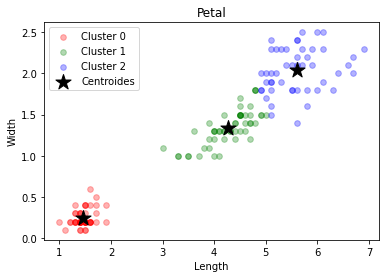

In [44]:
df1 = dataset[dataset.FlowerPredicted1==0]
df2 = dataset[dataset.FlowerPredicted1==1]
df3 = dataset[dataset.FlowerPredicted1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

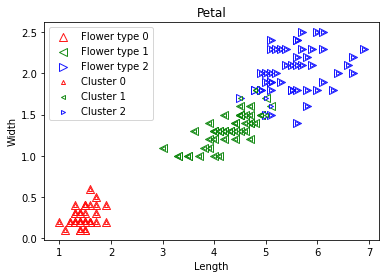

In [45]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = dataset[dataset.FlowerPredicted1==0]
df2 = dataset[dataset.FlowerPredicted1==1]
df3 = dataset[dataset.FlowerPredicted1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()

## Compute performance

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [47]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


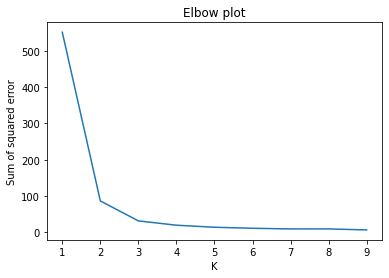

In [48]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# WORK IN PROGRESS

# Selecting K: Silhouette Coefficient

Selecting the number of clusters **k** using the silhouette coefficient

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
# Intialize a list to hold silhouette coefficients
silhouette_coefficients = []

# Define values of k
k_rng = range(1,10)

# Parametrs
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# For each k
for k in k_rng:
    # Create model
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # Do K-means clustering
    kmeans.fit_predict(df[['Petal_Length','Petal_Width']])
    # Compute silhouette coefficient
    score = silhouette_score(df[['Petal_Length','Petal_Width']], kmeans.labels_)
    # Save silhouette coefficient for each k
    silhouette_coefficients.append(score)

In [ ]:
# Plot silhouette coefficient versus k
plt.plot(k_rng,silhouette_coefficients)

plt.title('Silhouette Coefficients')
plt.xlabel('K')
plt.ylabel('silhouette_coefficients')
plt.show()

# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [ ]:
# Import library
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()


,Petal_Length,Petal_Width,Flower,Cluster1
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [ ]:
# Scale data
scaler.fit(df[['Petal_Length']])
df['Petal_Length_Scaled'] = scaler.transform(df[['Petal_Length']])

scaler.fit(df[['Petal_Width']])
df['Petal_Width_Scaled'] = scaler.transform(df[['Petal_Width']])

df

In [ ]:
dataset.describe()

,Petal_Length,Petal_Width,Flower,Cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.013333
std,0.299203,0.317599,0.819232,0.827276
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


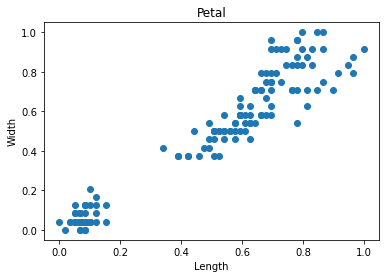

In [ ]:
# Scatter plot of the scaled data
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [ ]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

,Petal_Length,Petal_Width,Flower,Cluster1,Cluster2
0,0.067797,0.041667,0,0,1
1,0.067797,0.041667,0,0,1
2,0.050847,0.041667,0,0,1
3,0.084746,0.041667,0,0,1
4,0.067797,0.041667,0,0,1
...,...,...,...,...,...
145,0.711864,0.916667,2,1,0
146,0.677966,0.750000,2,1,0
147,0.711864,0.791667,2,1,0
148,0.745763,0.916667,2,1,0


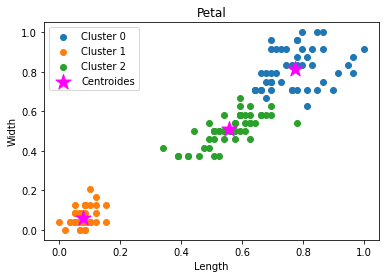

In [ ]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

WORK IN PROGRESS

In [ ]:
#Remove all observations from one of the classes

# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k